In [2]:
# !pip install yfinance --upgrade --no-cache-dir

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
#dados!
data = yf.download("^BVSP PETR4.SA")

[*********************100%***********************]  2 of 2 completed


In [7]:
data = data.dropna() # já é um pandas dataframe
data

Adj Close                     Close                      High  \
             PETR4.SA          ^BVSP   PETR4.SA          ^BVSP   PETR4.SA   
Date                                                                        
2000-01-03   4.050103   16930.000000   5.875000   16930.000000   5.875000   
2000-01-04   3.826055   15851.000000   5.550000   15851.000000   5.550000   
2000-01-05   3.787450   16245.000000   5.494000   16245.000000   5.494000   
2000-01-06   3.774351   16107.000000   5.475000   16107.000000   5.475000   
2000-01-07   3.791586   16309.000000   5.500000   16309.000000   5.500000   
...               ...            ...        ...            ...        ...   
2021-01-20  28.209999  119708.000000  28.209999  119708.000000  29.120001   
2021-01-21  27.549999  118443.000000  27.549999  118443.000000  28.400000   
2021-01-22  27.020000  117172.000000  27.020000  117172.000000  27.240000   
2021-01-26  27.000000  116726.000000  27.000000  116726.000000  27.969999   
2021-01-27  27.770000  116549.367188  27.770000  116549.367188  28.170000   

                                 Low                      Open                 \
                    ^BVSP   PETR4.SA          ^BVSP   PETR4.SA          ^BVSP   
Date                                                                            
2000-01-03   17408.000000   5.875000   16719.000000   5.875000   17098.000000   
2000-01-04   16908.000000   5.550000   15851.000000   5.550000   16908.000000   
2000-01-05   16302.000000   5.494000   15350.000000   5.494000   15871.000000   
2000-01-06   16499.000000   5.475000   15977.000000   5.475000   16237.000000   
2000-01-07   16449.000000   5.500000   16125.000000   5.500000   16125.000000   
...                   ...        ...            ...        ...            ...   
2021-01-20  121449.000000  28.110001  118740.000000  28.950001  120645.000000   
2021-01-21  120243.000000  27.510000  117785.000000  28.020000  119628.000000   
2021-01-22  118318.000000  26.559999  116109.000000  26.930000  118318.000000   
2021-01-26  119167.000000  26.820000  116480.000000  27.250000  117381.000000   
2021-01-27  117839.789062  26.530001  114886.507812  26.809999  116463.453125   

                  Volume              
                PETR4.SA       ^BVSP  
Date                                  
2000-01-03  3.538944e+10         0.0  
2000-01-04  2.886144e+10         0.0  
2000-01-05  4.303360e+10         0.0  
2000-01-06  3.405568e+10         0.0  
2000-01-07  2.091264e+10         0.0  
...                  ...         ...  
2021-01-20  6.030620e+07   7947300.0  
2021-01-21  4.128490e+07   8573900.0  
2021-01-22  3.837480e+07   9373100.0  
2021-01-26  6.451460e+07  10681400.0  
2021-01-27  5.403110e+07         0.0  

[5162 rows x 12 columns]

In [12]:
data.columns = ["_".join(col) for col in data.columns]

In [17]:
data.columns = [col.lower().replace(" ", "_") for col in data.columns]

In [24]:
df_adj = data.loc[:,[col for col in data.columns if col.startswith('adj')]] #só colunas comecando com 'adj'

<AxesSubplot:xlabel='Date'>

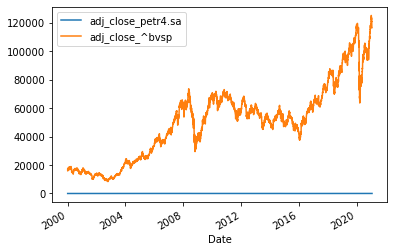

In [26]:
df_adj.plot() #ich!!! escala muito disparatada

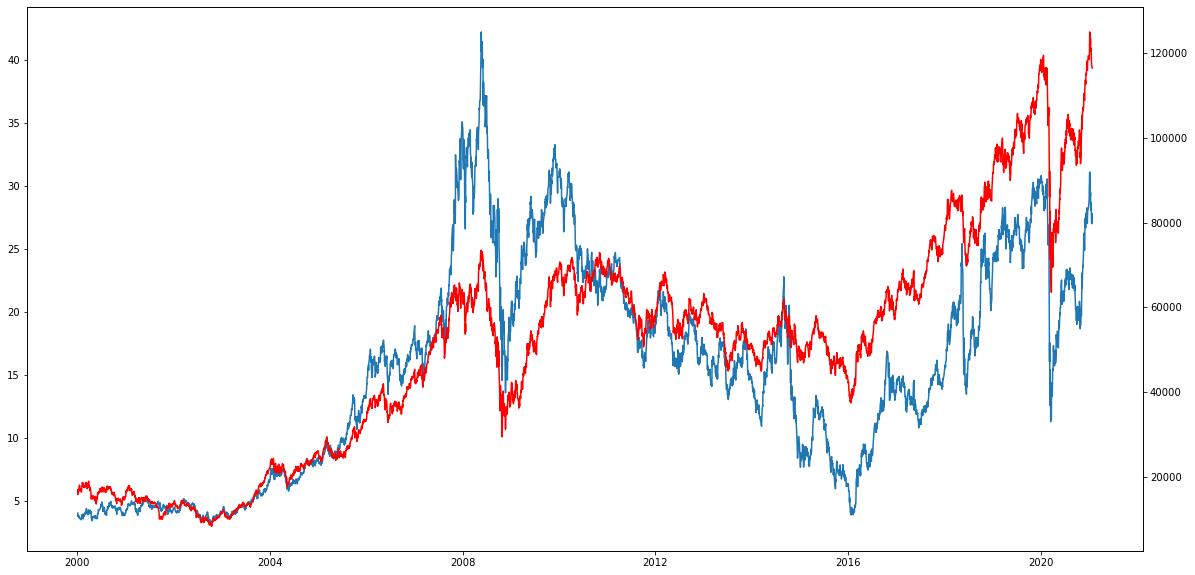

In [31]:
# duas soluções: 1) adiciona outro eixo
# 2) Normaliza os dados

#1
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(df_adj['adj_close_petr4.sa'])
ax2 = ax1.twinx()
ax2.plot(df_adj['adj_close_^bvsp'], color='r')

In [39]:
df_new.columns = ['petr','bvsp']

In [36]:
df_new = df_adj.loc[df_adj.index.year > 2009]

In [37]:
from sklearn.preprocessing import StandardScaler as sc

In [43]:
sc1 = sc()
sc2 = sc()

a = sc1.fit_transform(df_new.petr.values.reshape(-1, 1))
b = sc2.fit_transform(df_new.bvsp.values.reshape(-1, 1))

In [49]:
# a e b são duas numpy arrays! vamos recriar um dataframe com elas
df = pd.DataFrame({'petr':a.reshape(-1),'bov':b.reshape(-1)}, index=df_new.index)

<AxesSubplot:xlabel='Date'>

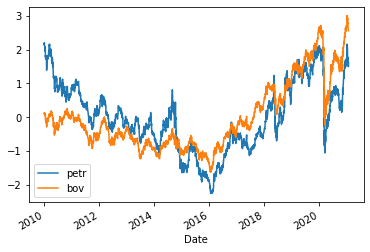

In [51]:
df.plot()

In [57]:
df['petr_gain'] = df.petr.diff()
df['bov_gain'] = df.bov.diff()

In [59]:
df = df.dropna()

[]

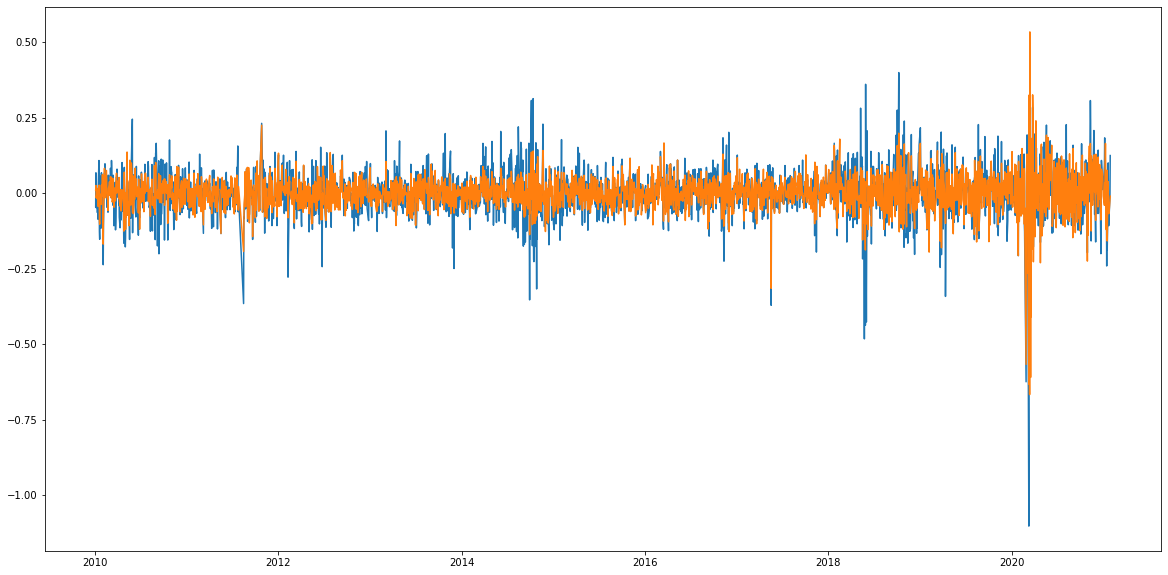

In [63]:
plt.figure(figsize=(20,10))
plt.plot(df.loc[:,['petr_gain','bov_gain']])
plt.plot()

(array([1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 8.000e+00, 3.400e+01,
        1.088e+03, 1.483e+03, 7.200e+01, 6.000e+00]),
 array([-1.10241366, -0.94664492, -0.79087617, -0.63510743, -0.47933868,
        -0.32356994, -0.16780119, -0.01203245,  0.1437363 ,  0.29950504,
         0.45527379]),
 <BarContainer object of 10 artists>)

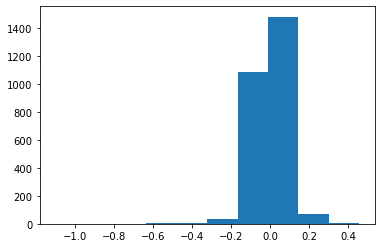

In [66]:
plt.hist(df.loc[:,['petr_gain']])

In [67]:
df.corr()

,petr,bov,spread,petr_gain,bov_gain
petr,1.000000,0.753530,0.349952,0.034699,0.033448
bov,0.753530,1.000000,-0.352145,0.039397,0.050173
spread,0.349952,-0.352145,1.000000,-0.006737,-0.023873
petr_gain,0.034699,0.039397,-0.006737,1.000000,0.771645
bov_gain,0.033448,0.050173,-0.023873,0.771645,1.000000


In [68]:
# ótimo! obrigado!